In [133]:
from IPython.display import display, Latex
from IPython.core.display import HTML
%reset -f
%matplotlib inline
%autosave 300
import matplotlib.pylab as plt
import sympy as sy
import numpy as np

Autosaving every 300 seconds


## Problème aux limites 1D
On considère le problème aux limites suivant
$$
\begin{cases}
    -u''(x)+u(x)=f(x) & \text{pour } x\in [0,1],\\
    u(0)=u(1),\quad u'(0)=u'(1), \text{(condition limite périodique)},
\end{cases} 
$$
où $f$ est une fonction donnée.
### Solution exacte
Choisir une fonction $u$ respectant les conditions limites et calculer $f$ à l'aide de la librairie sympy.

On va choisir $u(x)=x(\sin(2\pi x))^4+1$ qui est bien $1$-périodique.

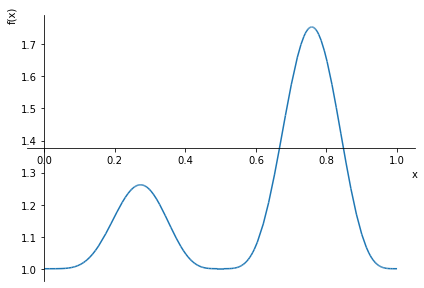

f(x)=


x*sin(2*pi*x)**4 - 16*pi*(-pi*x*sin(2*pi*x)**2 + 3*pi*x*cos(2*pi*x)**2 + sin(4*pi*x)/2)*sin(2*pi*x)**2 + 1

In [134]:
x=sy.symbols('x',real=True)
u=x*sy.sin(2*sy.pi*x)**4+1
sy.plot(u,(x,0,1))
print('f(x)=')
ff=-sy.diff(u,x,2)+u
ff=ff.simplify()
display(ff)
f=sy.lambdify(x,ff,'numpy')
uexact=sy.lambdify(x,u,'numpy')

## Méthode spectrale
- Proposer, dans une cellule Markdown, une base d'approximation de 
    dimension $n$ induite par une méthode de Galerkine de type spectrale.
On considère l'espace de fonction $V_n$ engendré par les fonctions 
    $\{\phi_k\}_{k=0}^{n-1}$ définies par 
$$\phi_0(x)=1, ~\phi_1(x)=\cos(2\pi  x),~ \phi_2(x)=\sin(2\pi  x),~\phi_3(x)=\cos(2\pi  2 x),~ \phi_4(x)=\sin(2\pi 2 x),~\cdots.$$
Ainsi pour $k>0$, $\phi_{2k}(x)=\sin(2\pi  k x)$ et $\phi_{2k-1}(x)=\cos(2\pi  k x)$.
- Décomposer $f$, construite précédemment, sur cette base d'approximation 
    dans une cellule python.
On va utiliser la fonction rfft de la librairie scipy fft.pack qui prend en entrée le vecteur de taille $n$ des évaluations de $f$ sur les $n$ points de la discrétisation uniforme de $[0,L-dx]$ de pas $dx$  et qui renvoie les $n$ coefficients de Fourier de $f$ qui sont les coefficients dans la base $V_n$ (à un facteur dépendant de $n$ près, voir cours).


fchap=


array([ 2.37500000e+01,  1.27897692e-13,  6.85845506e+01, -3.97284176e+02,
        5.24168975e+01, -3.96127575e-13, -2.59666110e+02,  3.95409176e+02,
       -1.31717911e+02,  1.27897692e-13,  7.90375725e+01, -2.84217094e-14,
        2.71884318e+01,  2.25597319e-13,  1.27555227e+01, -8.52651283e-14,
        6.41662055e+00, -7.10542736e-14,  2.75146565e+00,  2.55795385e-13])

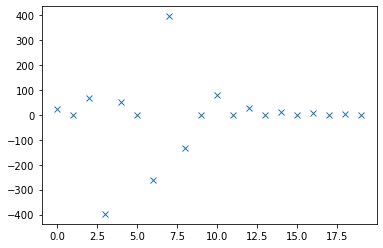

In [135]:
from scipy.fftpack import rfft, irfft
N=20
L=1
dx=L/N
x=np.linspace(0,L-dx,N)
fchap=rfft(f(x))
plt.plot(fchap,'x')
print('fchap=')
display(fchap)

- Ecrire le problème approché au limite dans cet espace 
    d'approximation (rédaction Markdown).

On cherche $u_n\in V_n$ tel que
$$
    -u_n''(x)+u_n(x)=\sum_{k=0}^{n-1}\hat{u}_k(\lambda_k+1)\phi_k(x)=\sum_{k=0}^{n-1}\hat{f}_k\phi_k(x),
$$
où $\hat{f}_k$ sont les coefficients de Fourier de $f$, $\hat{u}_k$ sont les coefficients de Fourier de $f$ et $\lambda_k$ sont les valeurs propres de $-\partial_x^2$ dans $V_n$:
$$
   -\phi_k''(x)= \lambda_k \phi_k(x).
$$
On identifie les coefficients de Fourier des deux membres de l'équation précédente pour obtenir :
$$
    \hat{u}_k=\frac{\hat{f}_k}{\lambda_k+1}.
$$
Ainsi, la solution approchée est donnée par
$$
    u_n(x)=\sum_{k=0}^{n-1}\frac{\hat{f}_k}{\lambda_k+1}\phi_k(x).
$$
- Résoudre le problème approché en python et tracer le graphe de la solution.
    - Comparer graphiquement la solution exacte et la solution approchée.
    - Etudier la convergence de la solution approchée en fonction de $n$. Conclure. (voir cours)


On a bien supperposition de la solution exacte et de la solution approchée
Erreur= 5.8235525068894844e-08


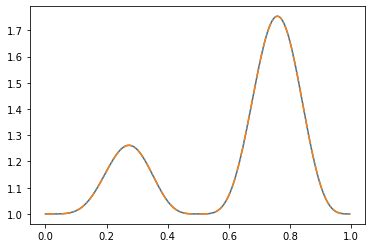

In [136]:
from scipy.fftpack import rfft, irfft
N=200
L=1
dx=L/N
x=np.linspace(0,L-dx,N)
fchap=rfft(f(x))
kk=np.zeros(N)
kk[1::2]=range(1,(N)//2 +1)
kk[2::2]=range(1,(N+1)//2)
lammb=(2*np.pi*kk/L)**2
uchap=fchap/(1+lammb)
u=irfft(uchap)
plt.plot(x,u)
plt.plot(x,uexact(x),'-.')
print('On a bien supperposition de la solution exacte et de la solution approchée')
print('Erreur=',max(abs(u-uexact(x))))

On a bien supperposition de la solution exacte et de la solution approchée
Erreur= 5.8235525068894844e-08


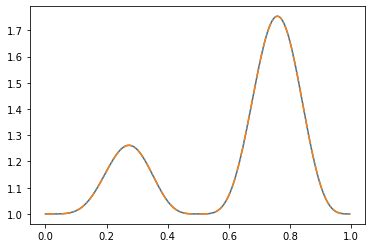

In [137]:
#avec la librairie scipy.fft (plus moderne) on peut obtenir le même résultat avec une décomposition dans un espace de dimension N//2+1
from scipy.fft import rfft, irfft
N=200
L=1
dx=L/N
x=np.linspace(0,L-dx,N)
fchap=rfft(f(x))
#kk=np.zeros(N/2)
kk=np.arange(0,(N)//2+1)

lammb=(2*np.pi*kk/L)**2
uchap=fchap/(1+lammb)
u=irfft(uchap)
plt.plot(x,u)
plt.plot(x,uexact(x),'-.')
print('On a bien supperposition de la solution exacte et de la solution approchée')
print('Erreur=',max(abs(u-uexact(x))))

## Dimension 2
On va produire l'extension du code en 2D pour le problème 2D suivant
$$
\begin{cases}
    -\Delta u(x,y)+u(x,y)=f(x,y) & \text{pour } (x,y)\in [0,1]\times[0,1],\\
    u(0,y)=u(1,y),\quad u(x,0)=u(x,1) & \text{pour } (x,y)\in [0,1]\times[0,1],\\
    \partial_x u(0,y)=\partial_x u(1,y),\quad \partial_y u(x,0)=\partial_y u(x,1) & \text{pour } (x,y)\in [0,1]\times[0,1].
\end{cases}
$$

In [145]:
x,y=sy.symbols('x y',real=True)
u=200*x**2*y**2*(1-x)**2*(1-y)**2+2
f=-sy.diff(u,x,2)-sy.diff(u,y,2)+u
f=f.simplify()
print('f(x,y)=')
display(f)
f=sy.lambdify((x,y),f,'numpy')
uexact=sy.lambdify((x,y),u,'numpy')

f(x,y)=


200*x**2*y**2*(x - 1)**2*(y - 1)**2 - 400*x**2*(x - 1)**2*(y**2 + 4*y*(y - 1) + (y - 1)**2) - 400*y**2*(y - 1)**2*(x**2 + 4*x*(x - 1) + (x - 1)**2) + 2

fchap=
[[-9.16770659e-09+0.00000000e+00j -5.13997904e-11+3.33794142e-11j
  -1.43045488e-11+3.21285426e-11j ... -3.37684590e-12+1.50346866e-12j
  -1.74934097e-12+2.69374887e-12j  0.00000000e+00+0.00000000e+00j]
 [ 3.06434678e-09+6.15074813e-09j -8.71346566e-12+5.34179450e-11j
   2.14390981e-11+5.83979296e-11j ... -2.43247852e-12+6.06910489e-12j
   7.21492063e-13+2.74322267e-12j  0.00000000e+00+0.00000000e+00j]
 [ 1.76951289e-08+2.04697201e-09j  6.30886425e-11+1.68770988e-10j
   5.93770462e-11+5.22331872e-11j ...  9.64322996e-13+8.25570874e-12j
   6.61803802e-12+6.73542197e-12j  0.00000000e+00+0.00000000e+00j]
 ...
 [-6.39704240e-09-1.19872978e-08j  6.86212004e-11-1.09136544e-10j
   3.39976670e-11+3.68821406e-11j ...  6.16143370e-14+5.27178160e-12j
   9.58997080e-13-6.68785895e-12j  0.00000000e+00+0.00000000e+00j]
 [ 1.86264515e-08-4.58501450e-10j -1.28519507e-10-1.26279688e-10j
  -7.85478218e-11-9.17492044e-12j ... -5.48992920e-12-6.24077904e-12j
  -8.84491271e-12-3.30633565e-12j  0.000

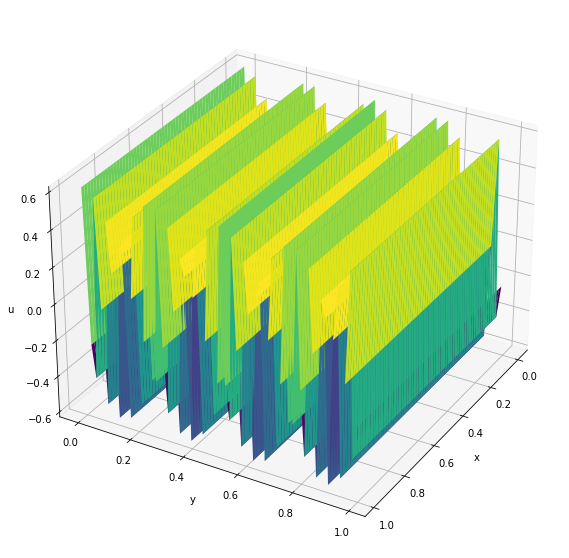

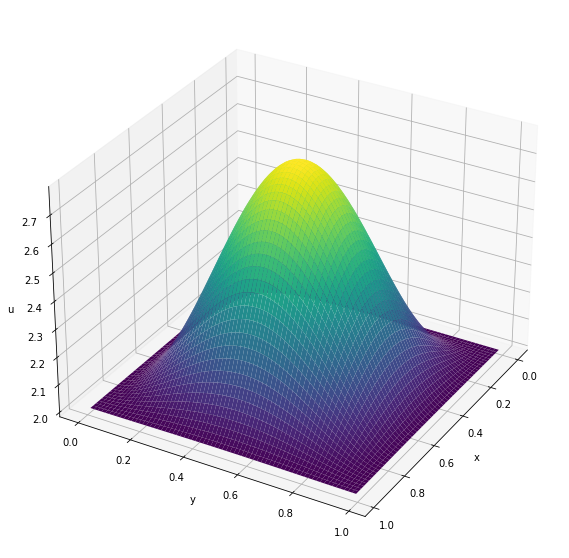

In [208]:
from scipy.fft import rfft2, irfft2

def ftest(x,y):
    #return (2*np.pi*0)**2*
    return np.cos(2*np.pi*0*x)*np.cos(2*np.pi*22*y)*(2*np.pi*22)**2
Nx=60
Ny=70
Lx=1
Ly=1
dx=Lx/Nx
dy=Ly/Ny
x=np.linspace(0,1-dx,Nx)
y=np.linspace(0,1-dy,Ny)
X,Y=np.meshgrid(x,y)
fchap=rfft2(ftest(X,Y))
print('fchap=')
print(fchap)
kkx=np.arange(0,(Nx)//2 +1)


kky=np.zeros(Ny)
kky[1::2]=np.arange(1,(Ny)//2 +1)
kky[2::2]=np.arange(1,(Ny+1)//2)
kky=np.arange(0,Ny)

kx,ky=np.meshgrid(kkx,kky)
lammb=(2*np.pi*kx/Lx)**2+(2*np.pi*ky/Ly)**2
#print(np.shape(lammb))
uchap=fchap/(1+lammb)
u=irfft2(uchap)
print(max(abs(u.flatten())))
print(u.shape,X.shape,Y.shape)
diffu=uexact(X,Y)-u
print('erreur=',max(abs(diffu).flatten()))
from mpl_toolkits import mplot3d
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, u, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u');
ax.view_init(30, 30)
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, uexact(X,Y), rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u');
ax.view_init(30, 30)

# Problème d'évolution 1D
On considère le problème d'évolution suivant
$$
    \begin{cases}
    \partial_t u(x,t)-\partial_{xx} u(x,t)+u(x,t)=f(x,t)& \text{pour } x\in [0,1],\quad t>0,\\
    u(x,0)=u_0(x) & \text{pour } x\in [0,1],\\
    u(0,t)=u(1,t) \quad \partial_x u(0,t)=\partial_x u(1,t) & \text{pour } t>0.
    \end{cases}
$$
On va résoudre d'abord le problème pour $f=0$ au temps final $T=0.1$ avec $u_0(x)=x(1-x)(\frac 1 2 -x)$.
On utilise la même base d'approximation que précédemment. On décompose la solution au temps $t$ sur cette base d'approximation et on obtient 
$$
    u(x,t)\simeq \sum_{k=0}^{n-1} \hat{u}_k(t)\phi_k(x).
$$
En injectant cette décomposition dans le problème d'évolution, on obtient le système d'équations différentielles ordinaires suivant
$$
    \begin{cases}
    \partial_t \hat{u}_k(t)+(\lambda_k+1)\hat{u}_k(t)=0 & \text{pour } k=0,\cdots,n-1,\\
    \hat{u}_k(0)=\widehat{u_0}_k .
    \end{cases}
$$
La solution s'écrit:
$$
    u(x,t)\simeq \sum_{k=0}^{n-1} \widehat{u_0}_k e^{-(\lambda_k+1)t}\phi_k(x).
$$
On va résoudre ce problème en python et tracer la solution pour $t=0.01$ et $t=0.1$.

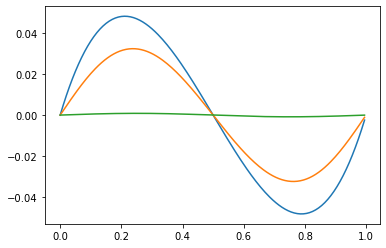

In [159]:
from scipy.fft import rfft, irfft
def u0(x):
    return x*(1-x)*(0.5-x)
L=1
N=200
dx=L/N
x=np.linspace(0,L-dx,N)
u=u0(x)
plt.plot(x,u)
fchap=rfft(u)
kk=np.arange(0,(N)//2+1)
lammb=(2*np.pi*kk/L)**2
t=0.01
uchap=np.exp(-(lammb+1)*t)*fchap
u=irfft(uchap)
plt.plot(x,u)
t=0.1
uchap=np.exp(-(lammb+1)*t)*fchap
u=irfft(uchap)
plt.plot(x,u)